In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
police_data = pd.read_csv('las_vegas_metropolitan_police_calls_for_service_1.csv')

In [3]:
police_data.shape

(171743, 10)

In [4]:
police_data_2020 = pd.read_csv('LVMPD_Calls_For_Service_2020.csv')

<ipython-input-4-688b575ae248>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  police_data_2020 = pd.read_csv('LVMPD_Calls_For_Service_2020.csv')


In [5]:
police_data_2020['incidenttypedescription'].unique()

array(['401 - ACCIDENT (TRAFFIC)', '401C - ACCIDENT (PRIVATE PROPERTY)',
       '401M - USED TO CLEAR 401S WHERE VEHS MOVED TO',
       '401P - ACCIDENT (TRAFFIC-PROPERTY DAMAGE ONLY)', '402 - FIRE',
       '402A - FIRE ALARM', '402Z - ATTEMPT FIRE',
       '404S - UNKNOWN TROUBLE SCHOOL', '406 - BURGLARY',
       '406D - BURGLARY/INVOLVES DOMESTIC VIOLENCE',
       '406Z - ATTEMPTED BURGLARY', '401A - HIT AND RUN', '407 - ROBBERY',
       '407A - ROBBERY ALARM',
       '407D - ROBBERY/INVOLVES DOMESTIC VIOLENCE',
       '407Z - ATTEMPT ROBBERY', '409 - DRUNK DRIVER',
       '410 - RECKLESS DRIVER', '411 - STOLEN MOTOR VEHICLE',
       '401B - ACCIDENT (WITH INJURY)',
       '411B - STOLEN DEPARTMENT BAIT CAR', '411E - EMBEZZLED VEHICLE',
       '413 - PERSON WITH A GUN', '413A - PERSON WITH A KNIFE',
       '413B - PERSON WITH OTHER DEADLY WEAPON', '414 - GRAND LARCENY',
       '415 - ASSAULT/BATTERY', '403 - PROWLER', '404 - UNKNOWN TROUBLE',
       '406A - BURGLARY ALARM', '406V - A

<ipython-input-6-c04b4db7e788>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 1440x1440 with 0 Axes>

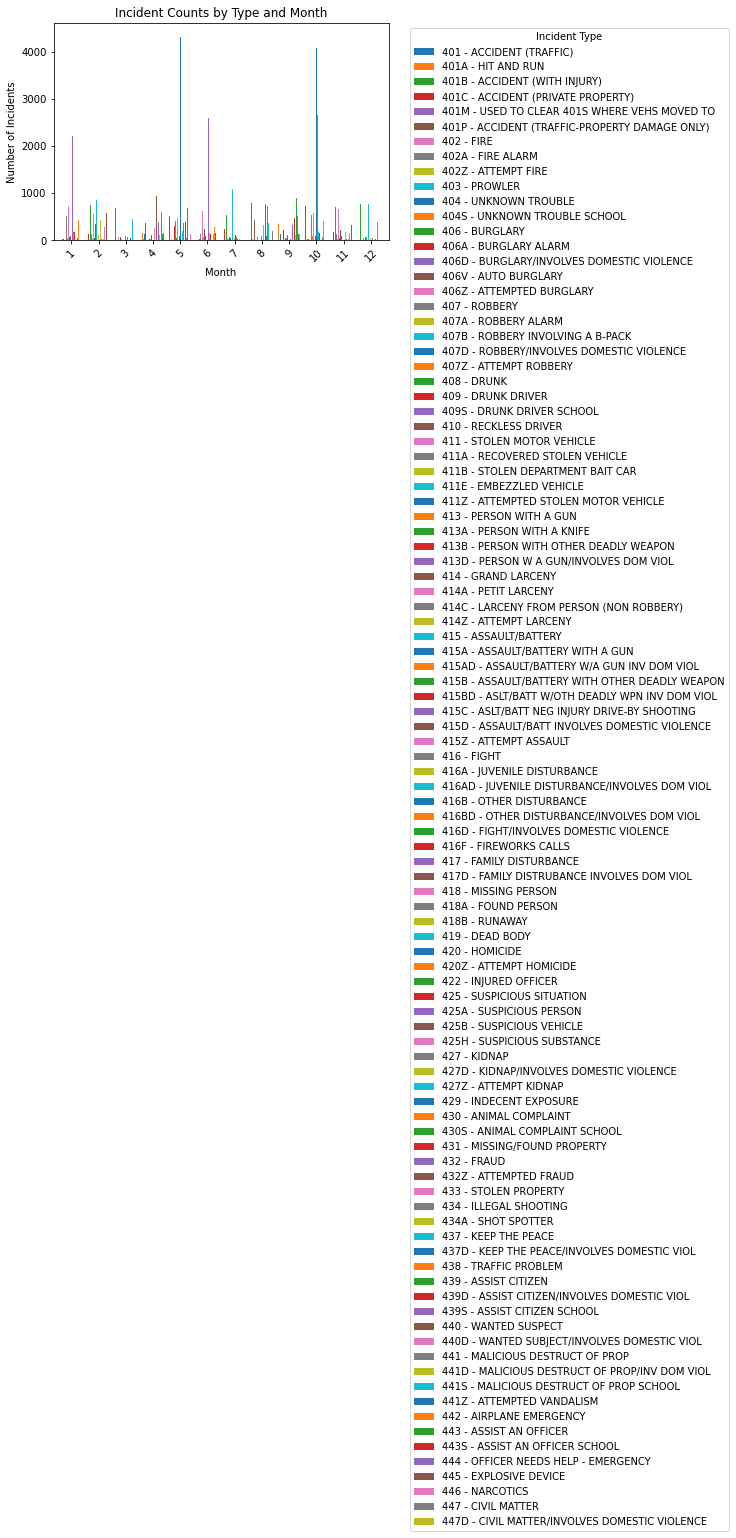

In [6]:
grouped_data = police_data_2020.groupby(['Month', 'incidenttypedescription']).size().unstack(fill_value=0)

# Plotting the data using a grouped bar chart
plt.figure(figsize=(20, 20))
grouped_data.plot(kind='bar', stacked=False, width=0.8)
plt.title('Incident Counts by Type and Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-7-67bc1b455073>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 1440x1440 with 0 Axes>

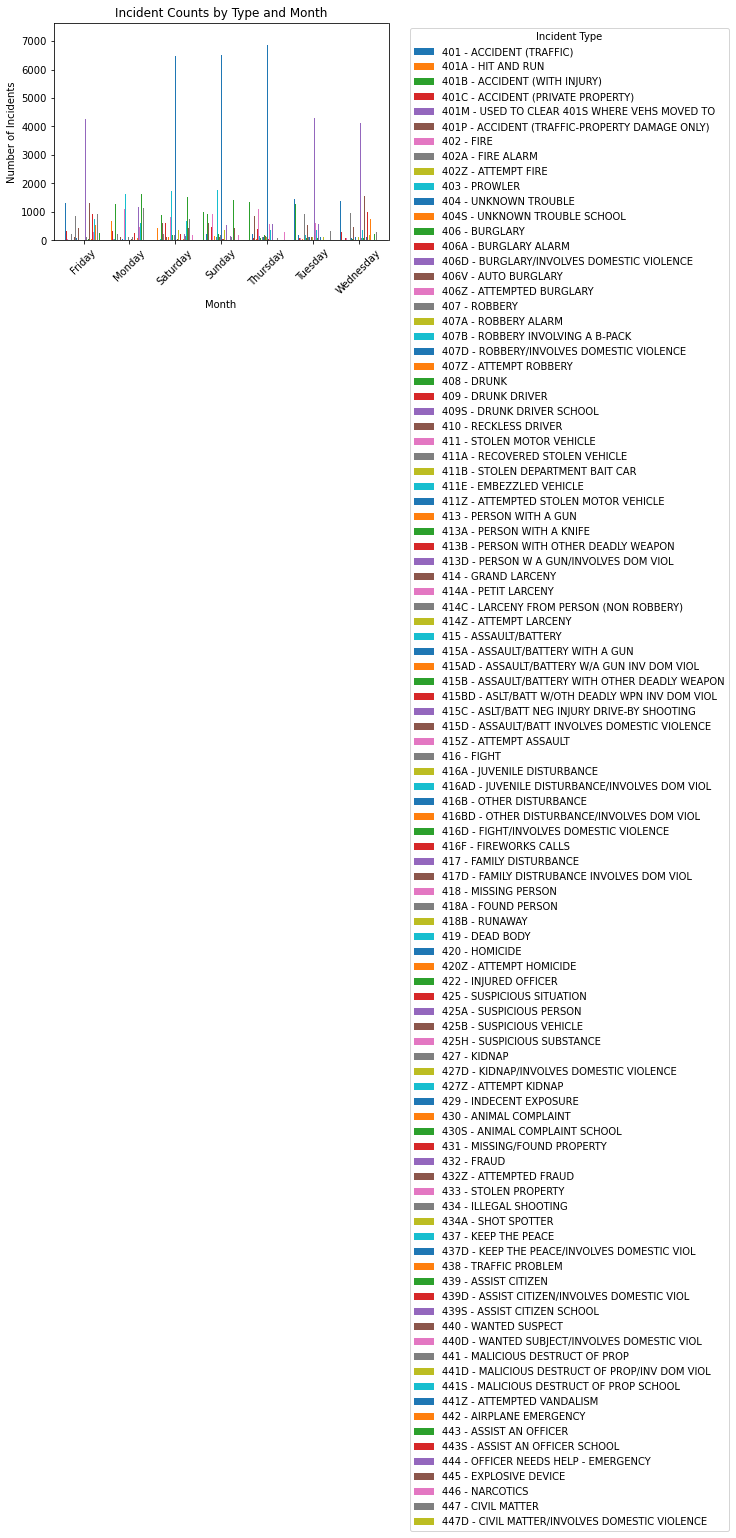

In [7]:
grouped_data = police_data_2020.groupby(['weekday', 'incidenttypedescription']).size().unstack(fill_value=0)

# Plotting the data using a grouped bar chart
plt.figure(figsize=(20, 20))
grouped_data.plot(kind='bar', stacked=False, width=0.8)
plt.title('Incident Counts by Type and Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
import nltk 
import matplotlib.pyplot as plt
import wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sammy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
police_data_2020['scores'] = police_data_2020['incidenttypedescription'].apply(lambda description: sid.polarity_scores(description))

In [10]:
police_data_2020.head()

,OBJECTID,incidentnumber,IncidentTypeCode,Classification,incidenttypedescription,disposition,incidentdate,hour,Month,weekday,year,dayofyear,quarterofyear,location,latitude,longitude,zipcode,x,y,scores
0,1,LLV200100001455,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),E,1/1/2020 2:56:23 PM,6,1,Wednesday,2020,1,1,N PECOS RD / STEWART AVE,36.166128,-115.098204,89101.0,-115.098204,36.166128,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp..."
1,2,LLV200100000124,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),E,1/1/2020 8:16:12 AM,0,1,Wednesday,2020,1,1,W CHEYENNE AVE / N MICHAEL WAY,36.216980,-115.216797,89108.0,-115.216802,36.217117,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp..."
2,3,LLV200100000499,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),K,1/1/2020 9:18:16 AM,1,1,Wednesday,2020,1,1,S DURANGO DR / W AGATE AVE,36.022663,-115.279013,89113.0,-115.279181,36.022678,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp..."
3,4,LLV200100001674,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),E,1/1/2020 3:51:22 PM,7,1,Wednesday,2020,1,1,S DURANGO DR / W MAULE AVE,36.061080,-115.279262,89113.0,-115.279431,36.061077,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp..."
4,5,LLV200100001271,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),C,1/1/2020 1:19:14 PM,5,1,Wednesday,2020,1,1,PASEO BREEZE DR / FOX HILL DR,36.167132,-115.364788,89138.0,-115.364788,36.167132,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp..."


In [11]:
police_data_2020['compound'] = police_data_2020['scores'].apply(lambda d: d['compound'])

In [12]:
police_data_2020

,OBJECTID,incidentnumber,IncidentTypeCode,Classification,incidenttypedescription,disposition,incidentdate,hour,Month,weekday,...,dayofyear,quarterofyear,location,latitude,longitude,zipcode,x,y,scores,compound
0,1,LLV200100001455,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),E,1/1/2020 2:56:23 PM,6,1,Wednesday,...,1,1,N PECOS RD / STEWART AVE,36.166128,-115.098204,89101.0,-115.098204,36.166128,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp...",-0.5904
1,2,LLV200100000124,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),E,1/1/2020 8:16:12 AM,0,1,Wednesday,...,1,1,W CHEYENNE AVE / N MICHAEL WAY,36.216980,-115.216797,89108.0,-115.216802,36.217117,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp...",-0.5904
2,3,LLV200100000499,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),K,1/1/2020 9:18:16 AM,1,1,Wednesday,...,1,1,S DURANGO DR / W AGATE AVE,36.022663,-115.279013,89113.0,-115.279181,36.022678,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp...",-0.5904
3,4,LLV200100001674,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),E,1/1/2020 3:51:22 PM,7,1,Wednesday,...,1,1,S DURANGO DR / W MAULE AVE,36.061080,-115.279262,89113.0,-115.279431,36.061077,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp...",-0.5904
4,5,LLV200100001271,401,Traffic Accident,401 - ACCIDENT (TRAFFIC),C,1/1/2020 1:19:14 PM,5,1,Wednesday,...,1,1,PASEO BREEZE DR / FOX HILL DR,36.167132,-115.364788,89138.0,-115.364788,36.167132,"{'neg': 0.657, 'neu': 0.343, 'pos': 0.0, 'comp...",-0.5904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247372,247373,LLV200700131430,447D,Civil Matter,447D - CIVIL MATTER/INVOLVES DOMESTIC VIOLENCE,K,7/31/2020 1:10:36 AM,18,7,Thursday,...,212,3,1800 BLOCK STEVENS ST,36.193144,-115.091924,89115.0,-115.091924,36.193144,"{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'comp...",-0.6249
247373,247374,LLV200800001859,447D,Civil Matter,447D - CIVIL MATTER/INVOLVES DOMESTIC VIOLENCE,J,8/1/2020 7:02:21 PM,12,8,Saturday,...,214,3,3900 BLOCK COSTA MESA AVE,36.166540,-115.091977,89110.0,-115.091977,36.166540,"{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'comp...",-0.6249
247374,247375,LLV200600072587,447D,Civil Matter,447D - CIVIL MATTER/INVOLVES DOMESTIC VIOLENCE,K,6/19/2020 1:16:24 AM,18,6,Thursday,...,170,2,8800 BLOCK SAILPLANE AVE,36.228756,-115.289726,89129.0,-115.289726,36.228756,"{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'comp...",-0.6249
247375,247376,LLV200600059596,447D,Civil Matter,447D - CIVIL MATTER/INVOLVES DOMESTIC VIOLENCE,J,6/16/2020 4:16:13 AM,21,6,Monday,...,167,2,8300 BLOCK W FLAMINGO RD,36.114717,-115.272556,89147.0,-115.272558,36.114604,"{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'comp...",-0.6249


In [32]:
police_data_2020['Mood'] = police_data_2020['compound'].apply(lambda score: 'Not-Extreme' if score > 0.3 else 'Extreme') 

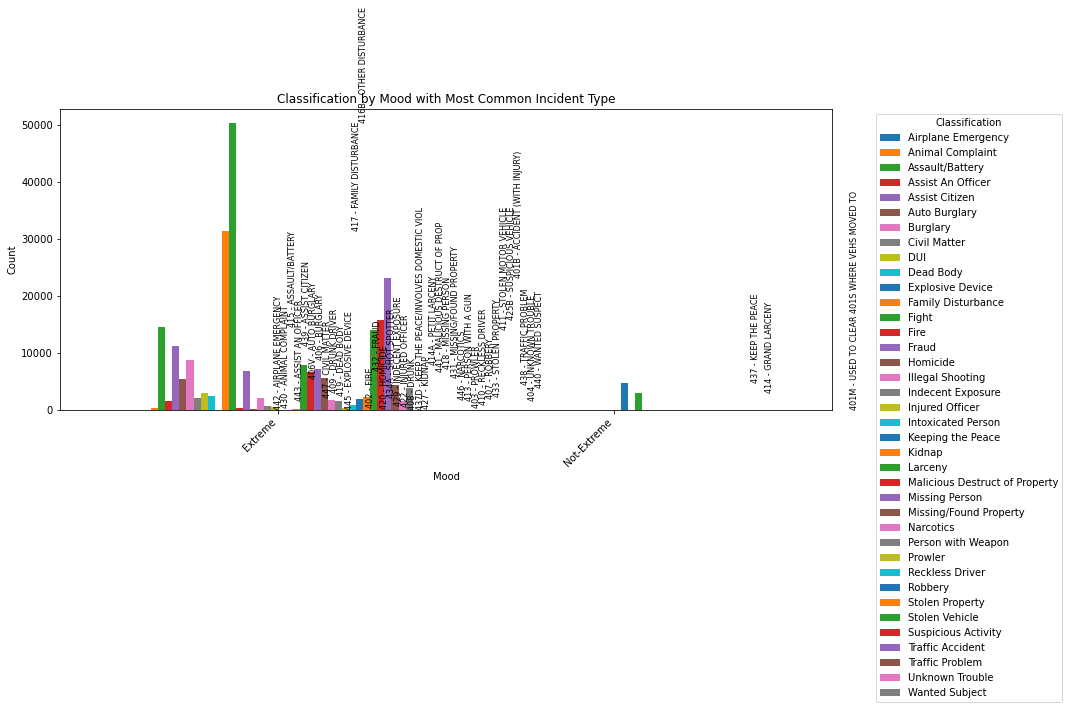

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your DataFrame police_data_2020 loaded

# Group the data and count occurrences
grouped_data = police_data_2020.groupby(['Mood', 'Classification']).size().unstack(fill_value=0)

# Find the most common incident type for each Mood-Classification combination
incident_types = police_data_2020.groupby(['Mood', 'Classification'])['incidenttypedescription'].agg(lambda x: x.value_counts().index[0])

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 8))
grouped_data.plot(kind='bar', ax=ax, width=0.8)

# Customize the plot
plt.title('Classification by Mood with Most Common Incident Type')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add text labels on top of each bar
for i, mood in enumerate(grouped_data.index):
    for j, classification in enumerate(grouped_data.columns):
        count = grouped_data.iloc[i, j]
        if count > 0:
            incident = incident_types.loc[mood, classification]
            ax.text(i + j * 0.8/len(grouped_data.columns), count, f"{incident}", 
                    ha='center', va='bottom', rotation=90, fontsize=8)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
police_data_2020[police_data_2020

SyntaxError: unexpected EOF while parsing (<ipython-input-15-2369336ddaa6>, line 1)